In [1]:
import torch
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from importlib import import_module
import pandas as pd
from PIL import Image
import cv2
import albumentations as A
import albumentations as A
from albumentations.pytorch import ToTensorV2
from torchvision import transforms
import matplotlib.pyplot as plt
import numpy as np
import dataloader
from collections import Counter

In [2]:
train_transform = A.Compose([
        A.CLAHE(always_apply=False, p=1 , clip_limit=(8, 8), tile_grid_size=(8, 8)),
        # A.GridDistortion(always_apply=False, p=0.3, num_steps=5, distort_limit=(-0.3, 0.3), interpolation=0, border_mode=0, value=(0, 0, 0), mask_value=None),
        # A.HorizontalFlip(always_apply=False, p=0.5),
        # A.CoarseDropout(always_apply=False, p=1.0, max_holes=14, max_height=8, max_width=8, min_holes=14, min_height=8, min_width=8),
                            ToTensorV2()
                            ])
    
val_transform = A.Compose([
        A.CLAHE(always_apply=False, p=1 , clip_limit=(8, 8), tile_grid_size=(8, 8)),
                            ToTensorV2()
                            ])

In [3]:
train_loader, valid_loader = dataloader.getDataloader(train_transform, val_transform, 16, 4,4)

In [4]:
re = []
for i in train_loader:
    i = i[1].tolist()
    re.extend(i)


In [5]:
Counter(re)

Counter({2: 1501, 1: 735, 3: 413, 4: 35, 0: 26})

/opt/conda/envs/mmseg/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  if __name__ == "__main__":


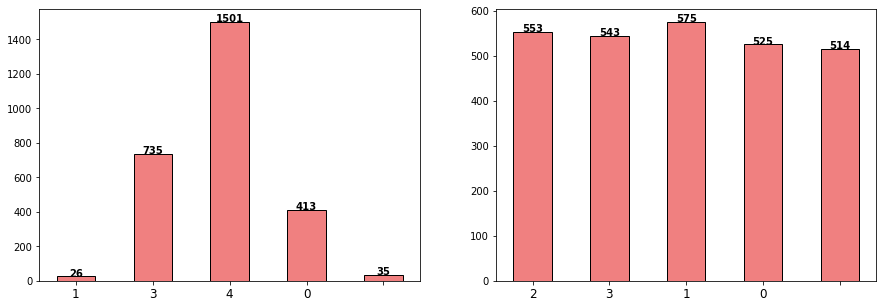

In [7]:
re_updown = {4: 514, 2: 575, 3: 525, 1: 543, 0: 553}
re = {2: 1501, 1: 735, 3: 413, 4: 35, 0: 26}

figure , axes = plt.subplots(1, 2, figsize=(15,5))
for i, n in enumerate([re, re_updown]):
    axes[i].bar(n.keys(), n.values(), color = "lightcoral",width=0.5, edgecolor="black",linewidth=1)
    for key, value in zip(n.keys(), n.values()):
        axes[i].text(key,value+1, value, ha="center", fontweight = "bold", size = 10)
    axes[i].set_xticklabels(n.keys(), fontsize = 12)
plt.show()

In [ ]:
train_transform = A.Compose([
        # A.CLAHE(always_apply=False, p=1.0, clip_limit=(1, 3), tile_grid_size=(8, 3)),
                            ToTensorV2()
                            ])

In [ ]:
train_data = pd.read_csv('/opt/ml/data/naverboostcamp_train.csv')
train_data = train_data[['part', 'oil', 'file_name']]
train_data = train_data[train_data['oil'] >= 0]
train_data.reset_index(drop=True, inplace=True)

In [ ]:
train_transform = A.Compose([
        A.CLAHE(always_apply=False, p=1.0, clip_limit=(1, 3), tile_grid_size=(8, 3)),
                            ToTensorV2()
                            ])

In [ ]:
train_dataset = OiltrainDataset(train_data, train_transform)

In [ ]:
train_dataset[0][0].shape

In [ ]:
a = 4
img = train_dataset[a][0]
img = img.detach().cpu().numpy()
img = np.transpose(img, (1, 2, 0))
# img = img * 255
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

figure, axes = plt.subplots(1,1,figsize=(6,6))
plt.imshow(img)

In [ ]:
class OiltrainDataset(Dataset):

    num_classes = 5
    image_paths = []
    part_labels = []
    oil_labels = []
    
    def __init__(self, df, transform=None):
        self.df = df
        self.transform = transform

    def __getitem__(self, idx):
        data=self.df.iloc[idx]
        img_path = "/opt/ml/data/naverboostcamp_train/JPEGImages/"+ data['file_name']

        oil_labels = data['oil']
        part_labels = data['part']
        # image = Image.open(img_path)
        image = cv2.imread(img_path)
        # image = A.CLAHE(always_apply=False, p=1.0, clip_limit=(1, 3), tile_grid_size=(8, 3))(image = image)["image"]
        # image = A.Resize(always_apply=False, p=1.0, height=512, width=512, interpolation=0)(image = image)
        # image = image["image"]
        # if int(part_labels) == 1:
        #     image = cv2.rectangle(image, (0,0), (700,120), (0,0,0),-1)
        #     image = cv2.rectangle(image, (0,400), (700,500), (0,0,0),-1)
        #     polly1 = np.array([[200,100],[0,100],[0,400]])
        #     polly2 = np.array([[500,100],[700,100],[700,400]])
        #     image = cv2.fillPoly(image,[polly1],color=(0,0,0))
        #     image = cv2.fillPoly(image,[polly2],color=(0,0,0))

        if self.transform:
            image = self.transform(image = image)["image"]
            
        return image, oil_labels
    
    def __len__(self):
        return len(self.df)

class OilvalDataset(Dataset):
    num_classes = 5
    
    image_paths = []
    part_labels = []
    oil_labels = []
    
    def __init__(self, df, transform=None):
        self.df = df
        self.transform = transform
    def __getitem__(self, idx):
        data=self.df.iloc[idx]
        
        img_path = "/opt/ml/data/naverboostcamp_val/JPEGImages/"+ data['file_name']
        # image = Image.open(img_path)
        oil_labels = data['oil']
        part_labels = data['part']

        image = cv2.imread(img_path)
        image = A.Resize(always_apply=False, p=1.0, height=512, width=512, interpolation=0)(image = image)
        image = image["image"]
        # if int(part_labels) == 1:
        #     image = cv2.rectangle(image, (0,0), (700,120), (0,0,0),-1)
        #     image = cv2.rectangle(image, (0,400), (700,500), (0,0,0),-1)
        #     polly1 = np.array([[200,100],[0,100],[0,400]])
        #     polly2 = np.array([[500,100],[700,100],[700,400]])
        #     image = cv2.fillPoly(image,[polly1],color=(0,0,0))
        #     image = cv2.fillPoly(image,[polly2],color=(0,0,0))

        
        if self.transform:
            image = self.transform(image = image)["image"]
            
        
            
        return image, oil_labels
    
    def __len__(self):
        return len(self.df)

def getDataloader(train_transform, val_transform, batch, train_worker, valid_worker):
    train_data = pd.read_csv('/opt/ml/data/naverboostcamp_train.csv')
    valid_data = pd.read_csv('/opt/ml/data/naverboostcamp_val.csv')

    train_data = train_data[['part', 'oil', 'file_name']]
    valid_data = valid_data[['part', 'oil', 'file_name']]

    train_data = train_data[train_data['oil'] >= 0]
    valid_data = valid_data[valid_data['oil'] >=0]
 

    train_data.reset_index(drop=True, inplace=True)
    valid_data.reset_index(drop=True, inplace=True)
    
    train_dataset= OiltrainDataset(train_data, train_transform)
    val_dataset= OilvalDataset(valid_data, val_transform)
    
    train_loader = DataLoader(train_dataset,
                              shuffle=True,
                              num_workers = train_worker,
                              batch_size = batch,)
    valid_loader = DataLoader(val_dataset,
                              shuffle=False,
                              num_workers = valid_worker,
                              batch_size = batch,)
    return train_loader, valid_loader